In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [5]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Survival Count')

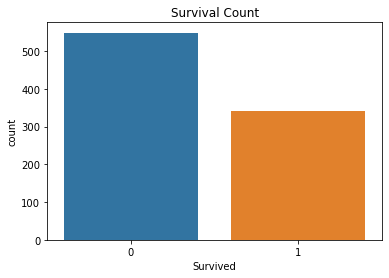

In [6]:
sns.countplot(train_data['Survived']).set_title('Survival Count')

# Feature Analysis

## Sex

Text(0, 0.5, '')

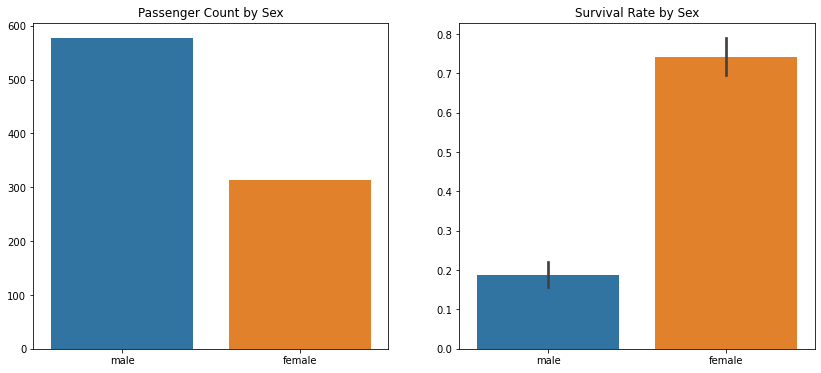

In [7]:
fig, axarr = plt.subplots(1,2, figsize=(14,6))

sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passenger Count by Sex')
sns.barplot(x=train_data['Sex'], y=train_data['Survived'], ax=axarr[1]).set_title('Survival Rate by Sex')

axarr[0].set_xlabel("")
axarr[0].set_ylabel("")
axarr[1].set_xlabel("")
axarr[1].set_ylabel("")

In [8]:
train_data.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

We see that 64.8% of the passengers were male, but they account for the most deaths. Women were four times more likely to survive. In fact, women had a 74.2% chance of surviving.

In [9]:
train_data.groupby(['Sex']).Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## PClass

Text(0, 0.5, '')

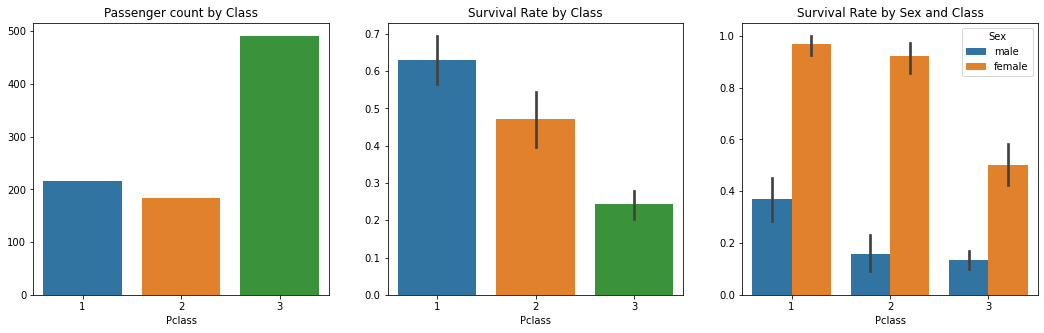

In [10]:
fig, axarr = plt.subplots(1,3, figsize=(18,5))

sns.countplot(train_data['Pclass'], ax=axarr[0]).set_title("Passenger count by Class")
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'], ax=axarr[1]).set_title('Survival Rate by Class')
sns.barplot(x=train_data['Pclass'], y = train_data['Survived'], hue=train_data['Sex'], ax=axarr[2]).set_title("Survival Rate by Sex and Class")

axarr[0].set_ylabel('')
axarr[1].set_ylabel('')
axarr[2].set_ylabel('')

In [11]:
train_data.groupby(['Pclass','Sex']).Survived.agg(['mean', 'count'])

mean  count
Pclass Sex                    
1      female  0.968085     94
       male    0.368852    122
2      female  0.921053     76
       male    0.157407    108
3      female  0.500000    144
       male    0.135447    347

We can also see the survival rate by Sex and Pclass, which is quite impressive: first class and second class women who were rescued were respectively 97% and 92%, while the percentage drops to 50% for third-class women.
Despite that, this is still more than the 37% survival rate for first-class men.

## Age

Although there are many missing values for the age column, we see that the average age was below 30 years. Boys from 0-18 had a higher chance of being rescued, while most men older than 65 did not survive. As of now, age does not seem to have any significance in our data.

Text(0.5, 0, 'Age')

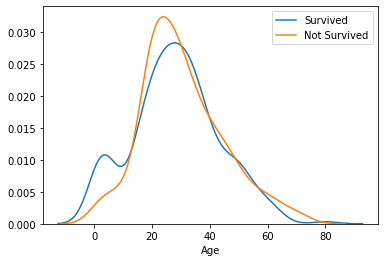

In [12]:
sns.kdeplot(train_data[train_data.Survived==1]['Age'], label='Survived').set_xlabel('Age')
sns.kdeplot(train_data[train_data.Survived==0]['Age'], label='Not Survived').set_xlabel('Age')

In [13]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

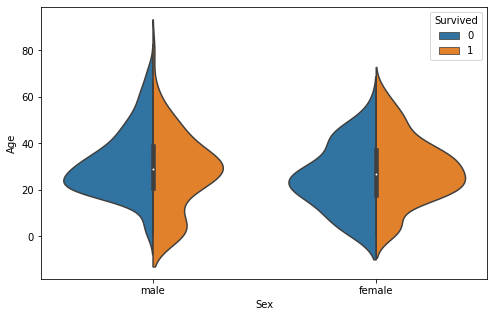

In [14]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Sex", y="Age", data=train_data, hue='Survived', split=True)

C:\Users\chris\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\chris\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


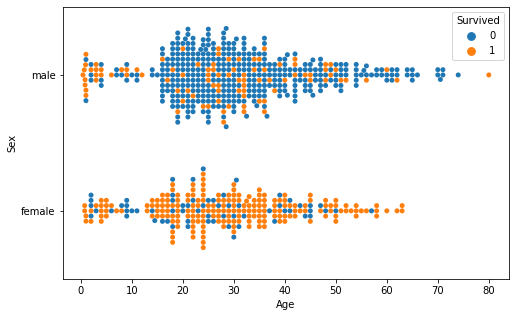

In [15]:
plt.figure(figsize=(8,5))

sns.swarmplot(x="Age", y="Sex", hue="Survived", data=train_data)

In [16]:
train_data[train_data.Age > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


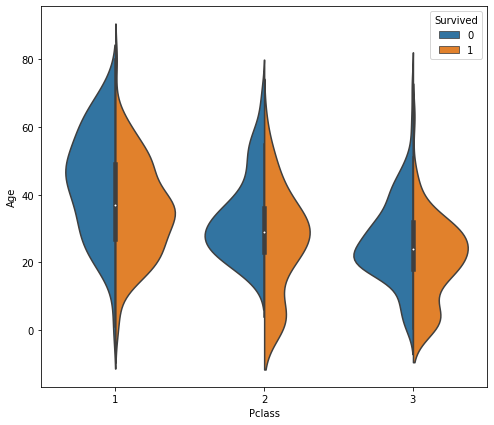

In [17]:
plt.figure(figsize=(8,7))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True)
plt.show()

C:\Users\chris\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\chris\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


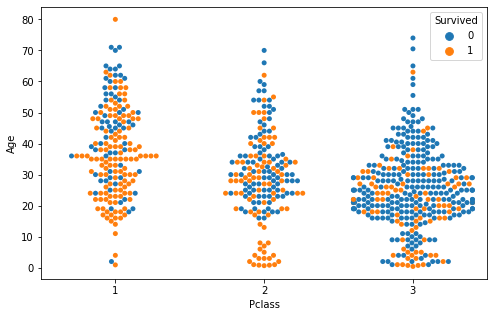

In [18]:
plt.figure(figsize=(8,5))

sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=train_data)
plt.show()

## SibSp

From the graphs below, we see that most passengers did not have a sibling or spouse with them. The graphs don't show a clear pattern between the number of siblings/spouses and their survival rate.

In [19]:
train_data['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

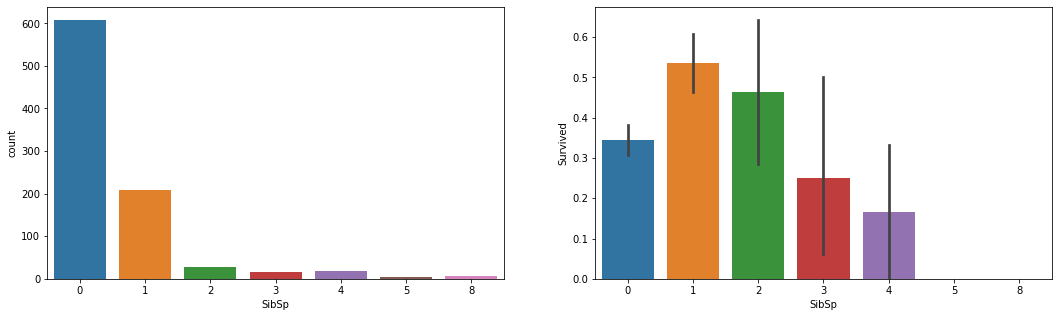

In [20]:
fig, axarr = plt.subplots(1,2, figsize=(18,5))

sns.countplot(train_data['SibSp'], ax=axarr[0])
sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1])


## Parch

Like the previous column analyzed, parch does not any clear pattern between the number of parents/children and their survival rate. In the next section, we will combine these columns to create a 'FamSize' column that should give us more information.

In [21]:
train_data['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

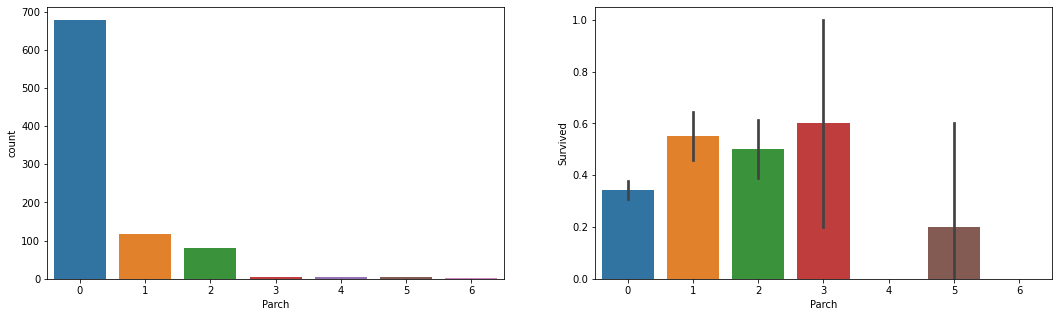

In [22]:
fig, axarr = plt.subplots(1,2, figsize=(18,5))

sns.countplot(train_data['Parch'], ax=axarr[0])
sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1])

## Fare

In [23]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Fare Bucket')

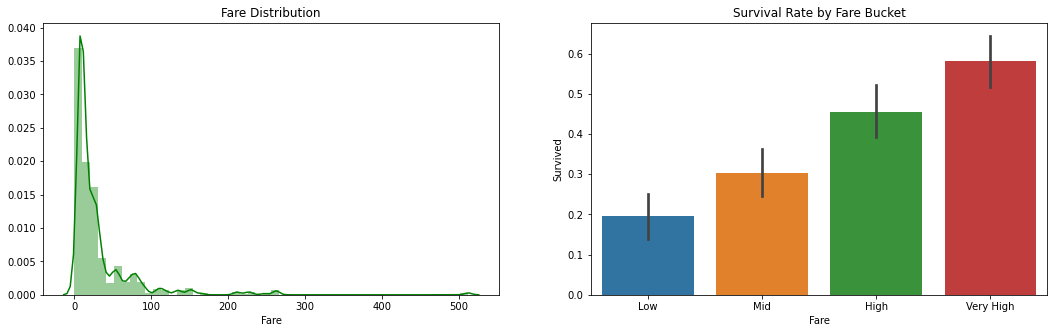

In [24]:
fig, axarr = plt.subplots(1,2,figsize=(18,5))

sns.distplot(train_data['Fare'], ax=axarr[0], color='g').set_title("Fare Distribution")

fare_ranges = pd.qcut(train_data['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

sns.barplot(x=fare_ranges, y=train_data['Survived'], ax=axarr[1]).set_title('Survival Rate by Fare Bucket')

## Embarked

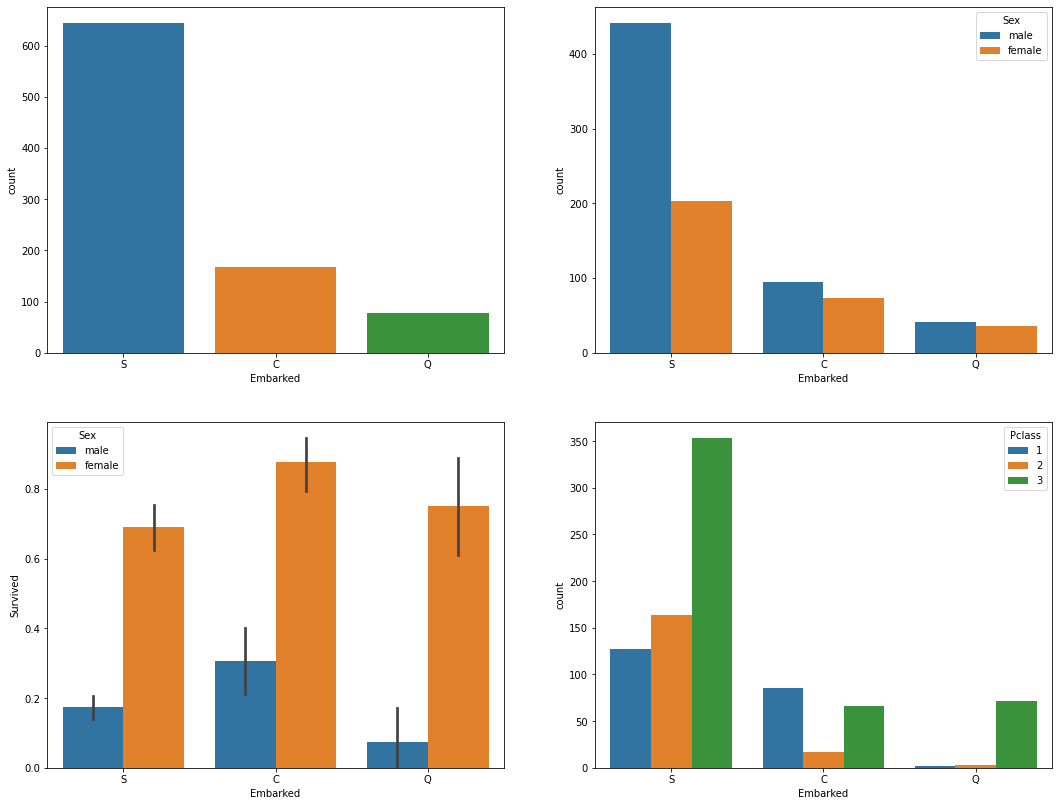

In [25]:
fig, axarr = plt.subplots(2,2,figsize = (18,14))

sns.countplot(train_data['Embarked'], ax=axarr[0][0])
sns.countplot(train_data['Embarked'], hue=train_data['Sex'], ax=axarr[0][1])
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train_data, ax=axarr[1][0])
sns.countplot(x='Embarked', hue='Pclass', data=train_data)

In [26]:
train_data.groupby(['Embarked', 'Sex']).Survived.agg(['mean', 'count'])

mean  count
Embarked Sex                    
C        female  0.876712     73
         male    0.305263     95
Q        female  0.750000     36
         male    0.073171     41
S        female  0.689655    203
         male    0.174603    441

At first glance, we notice that most passengers boarded in Southampton. The third graph shows that passengers that boarded from here have a lower survival rate. This, however, could be because the majority of passengers from this location belonged in the third class

# Filling Missing Values

In [27]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Doling, Miss. Elsie",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [29]:
train_data.corr().Age

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

In [30]:
train_data.groupby(['Pclass', 'Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [31]:
train_data2 = train_data.copy()
test_data2 = test_data.copy()

In [32]:
train_data2.Age = train_data2.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.fillna(x.mean()))
test_data2.Age = test_data2.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.fillna(x.mean()))

In [33]:
train_data2.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [34]:
test_data2.isnull().sum().sort_values(ascending=False)

Cabin          327
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [35]:
train_data2['Embarked'] = train_data2['Embarked'].fillna('S')
train_data2.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [36]:
test_data2[test_data2['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [37]:
test_data2['Fare'] = test_data2.groupby(['Pclass']).Fare.apply(lambda x: x.fillna(x.mean()))

In [38]:
test_data2.isnull().sum().sort_values(ascending=False)

Cabin          327
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

# Feature Creation

## Title from Name

In [39]:
train_data2['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [40]:
train_data2['Title'] = train_data2['Name'].str.split(", ", expand=True)[1].str.split('.', expand=True)[0]
train_data2.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs


In [41]:
test_data2['Title'] = train_data2['Name'].str.split(", ", expand=True)[1].str.split('.', expand=True)[0]
test_data2.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,Miss
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,Mr
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q,Mr
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S,Master
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S,Mrs


In [42]:
train_data2['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Mme               1
Ms                1
the Countess      1
Sir               1
Capt              1
Lady              1
Jonkheer          1
Name: Title, dtype: int64

In [43]:
test_data2['Title'].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Dr          3
Rev         3
Don         1
Mme         1
Name: Title, dtype: int64

In [44]:
titles = (train_data2['Title'].value_counts() < 10)
print(titles)

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Mlle             True
Major            True
Don              True
Mme              True
Ms               True
the Countess     True
Sir              True
Capt             True
Lady             True
Jonkheer         True
Name: Title, dtype: bool


In [45]:
train_data2['Title'] = train_data2['Title'].apply(lambda x: 'Misc' if titles.loc[x] == True else x)

In [46]:
test_data2['Title'] = test_data2['Title'].apply(lambda x: 'Misc' if titles.loc[x] == True else x)

In [47]:
train_data2['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [48]:
test_data2['Title'].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Misc        8
Name: Title, dtype: int64

In [49]:
train_data2[train_data2.Sex == 'female'].groupby(['Title']).Survived.agg(['mean', 'count'])

,mean,count
Title,,
Misc,1.000000,7
Miss,0.697802,182
Mrs,0.792000,125


In [50]:
train_data2[train_data2.Sex == 'male'].groupby(['Title']).Survived.agg(['mean', 'count'])

,mean,count
Title,,
Master,0.575000,40
Misc,0.250000,20
Mr,0.156673,517


## Family Size

In [51]:
train_data2['FamSize'] = train_data2['SibSp'] + train_data2['Parch'] + 1
test_data2['FamSize'] = test_data2['SibSp'] + test_data2['Parch'] + 1

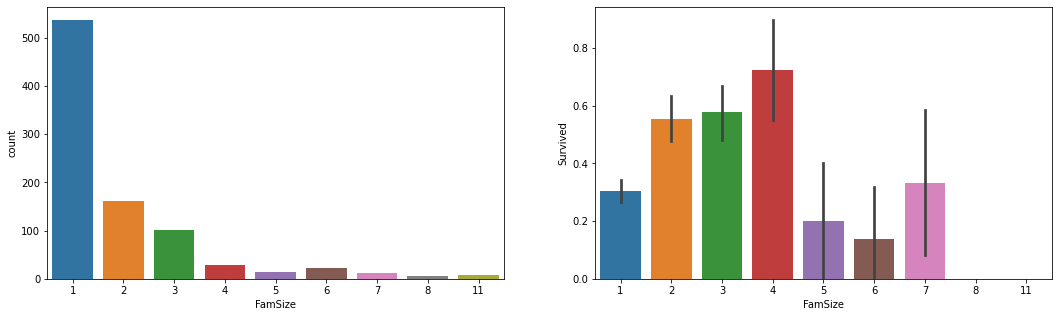

In [52]:
fig, axarr = plt.subplots(1,2,figsize=(18,5))

sns.countplot(train_data2['FamSize'], ax=axarr[0])
sns.barplot(x='FamSize', y='Survived', data=train_data2, ax=axarr[1])

# Modeling

Since I've already filled the missing values in the columns that will be used in the model, I won't use a pipeline to change categorical values to numerical ones.

In [53]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  FamSize      891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [54]:
features = ['Pclass', 'Sex', 'Age','Fare', 'Embarked', 'Title', 'FamSize']

X = train_data2[features].copy()
X_test = test_data2[features].copy()

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    object 
 5   Title     891 non-null    object 
 6   FamSize   891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [56]:
cat_columns = ['Sex', 'Embarked', 'Title']

for c in cat_columns:
    X[c] = X[c].astype('category')
    X_test[c] = X_test[c].astype('category')
    
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
X_test[cat_columns] = X_test[cat_columns].apply(lambda x: x.cat.codes)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int8   
 5   Title     891 non-null    int8   
 6   FamSize   891 non-null    int64  
dtypes: float64(2), int64(2), int8(3)
memory usage: 30.6 KB


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int8   
 5   Title     418 non-null    int8   
 6   FamSize   418 non-null    int64  
dtypes: float64(2), int64(2), int8(3)
memory usage: 14.4 KB


In [59]:
y = train_data2['Survived']

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)